In [1]:
import dynamics_analysis as da
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

%load_ext autoreload
%autoreload 2

dashes_arr=[ [1,2,5,2], [1,1,1,1], [3,3,3,3] ]
plt.rcParams["legend.edgecolor"]='black'
plt.rcParams["legend.framealpha"]=1


In [2]:
path = '../../data_fortran/MPOL_DCT_85/data/'
paramchar_cal_cav1 = "nl2_wc5.500_n1_1_E0.10E-09_dtadd0.85_ar0.0_wq5.000_g0.000_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.000_anh159.155_dt0.0100_errl0.1E-03_qb1_cv1.0_tmax80"
dyn_cal_cav1 = da.dynamics(2,path, paramchar_cal_cav1)

dyns={}
path = '../../data_fortran/MPOL_DCT_121/data/'

paramchar= "nl2_wc5.500_n1_1_E0.17E-02_dtadd2.00_2.50_8_ar0.0_wq5.000_g0.050_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.0250_anh159.155_dt0.0100_errl0.1E-03_lsfe14_qb1_cv0.0_tmax80"
dyns[1] = da.dynamics(2,path, paramchar)
paramchar= "nl2_wc5.500_n2_2_E0.17E-02_dtadd2.00_2.50_8_ar0.0_wq5.000_g0.050_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.0250_anh159.155_dt0.0100_errl0.1E-03_lsfe14_qb1_cv0.0_tmax80"
dyns[2] = da.dynamics(2,path, paramchar)
paramchar= "nl2_wc5.500_n2_10_E0.10E-04_dtadd2.00_2.50_8_ar0.0_wq5.000_g0.050_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.0250_anh159.155_dt0.0100_errl0.1E-03_lsfe14_qb1_cv0.0_tmax80"
dyns[10] = da.dynamics(2,path, paramchar)


path = '../../data_fortran/MPOL_DCT_122/data/'
paramchar= "nl2_wc5.500_n2_40_E0.10E-03_dtadd1.80_2.00_8_ar0.0_wq5.000_g0.050_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.0250_anh159.155_dt0.0100_errl0.1E-03_lsfe14_qb1_cv0.0_tmax81"
dyns[36] = da.dynamics(2,path, paramchar)

path = '../../data_fortran/MPOL_DCT_122/data/'
paramchar= "nl2_wc5.500_n2_50_E0.10E-04_dtadd1.40_5.40_5_ar0.0_wq5.000_g0.050_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.0250_anh159.155_dt0.0100_errl0.1E-03_lsfe14_qb1_cv0.0_tmax80"
dyns[50] = da.dynamics(2,path, paramchar)

dyns_LP = {}
path = '../../data_fortran/MPOL_DCT_101/data/'
paramchar = "nl2_wc5.500_n2_10_E-0.99E+02_dtadd6.00_6.00_8_ar0.0_wq5.000_g0.050_gam0.016000_nm500_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.003_anh159.155_dt0.0100_errl0.1E-03_lsfe14_qb1_cv0.0_tmax320"
dyns_LP[10] = da.dynamics(2,path, paramchar)

times_me={}
pplt_me={}
photons_me={}
entropy_me={}

path = '../../data_me/'
char = "tmax80_Nq2_Nc20_amp0.0250_kappa0.0100_wq5.0000_anh15915494.1500_wc5.5000_wd5.5000_ms1e-04_dimexp20_qb[1]_00_TRSM0.d"
times_me[5.0] = np.loadtxt(path+"N_"+char)[:,0]
pplt_me[5.0] = np.loadtxt(path+"PPLT_"+char)
photons_me[5.0] = np.loadtxt(path+"N_"+char)[:,1]
entropy_me[5.0] = np.loadtxt(path+"ENTROPY_"+char)[:]
char = "tmax80_Nq2_Nc25_amp0.0250_kappa0.0100_wq4.9000_anh15915494.1500_wc5.5000_wd5.5000_ms1e-04_dimexp20_qb[1]_00_TRSM0.d"
times_me[4.9] = np.loadtxt(path+"N_"+char)[:,0]
pplt_me[4.9] = np.loadtxt(path+"PPLT_"+char)
photons_me[4.9] = np.loadtxt(path+"N_"+char)[:,1]
entropy_me[4.9] = np.loadtxt(path+"ENTROPY_"+char)[:]
char = "tmax80_Nq2_Nc25_amp0.0250_kappa0.0100_wq4.8500_anh15915494.1500_wc5.5000_wd5.5000_ms1e-04_dimexp20_qb[1]_00_TRSM0.d"
times_me[4.85] = np.loadtxt(path+"N_"+char)[:,0]
pplt_me[4.85] = np.loadtxt(path+"PPLT_"+char)
photons_me[4.85] = np.loadtxt(path+"N_"+char)[:,1]
entropy_me[4.85] = np.loadtxt(path+"ENTROPY_"+char)[:]


## Decay rate calibration


-- fitted decay rate/(2*np.pi) = 0.009983833941564886 GHz


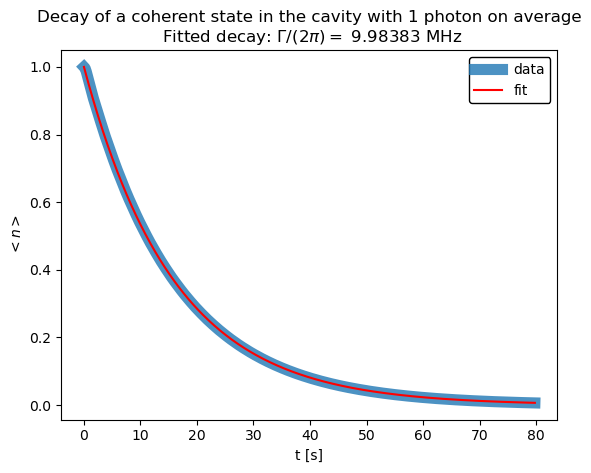

In [3]:
from scipy.optimize import curve_fit

def exp_decay(t,gamma):
    return np.exp( -gamma*t )

opt, _ = curve_fit( exp_decay, dyn_cal_cav1.times, dyn_cal_cav1.nk[:,0] )
Gamma=opt[0]

print( '-- fitted decay rate/(2*np.pi) =', Gamma/(2*np.pi), "GHz" )

plt.plot( dyn_cal_cav1.times[1:], dyn_cal_cav1.nk[1:,0], linewidth=8, alpha=0.8,label='data'  )
plt.plot( dyn_cal_cav1.times[1:], exp_decay( dyn_cal_cav1.times[1:], opt[0]), c='red', label='fit'  )
plt.ylabel( "$<n>$" )
plt.xlabel('t [s]')
plt.title('Decay of a coherent state in the cavity with 1 photon on average\n Fitted decay: $\Gamma/(2\pi)=$ '+str(np.round(1e3*Gamma/(2*np.pi),5))+' MHz')
plt.legend()

## CAVITY PHOTON NUMBER and ERROR versus time

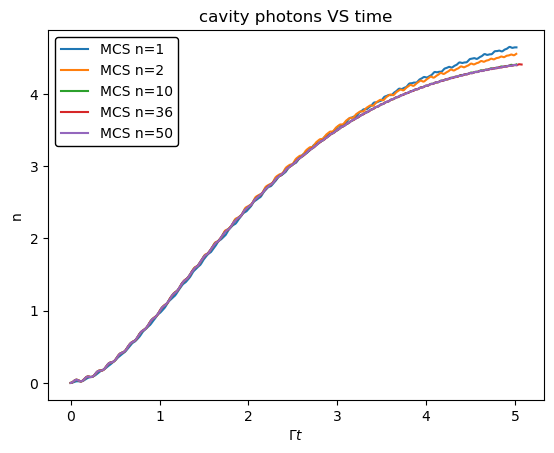

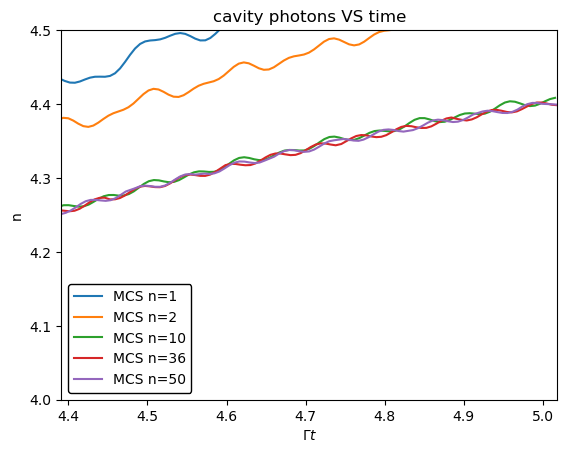

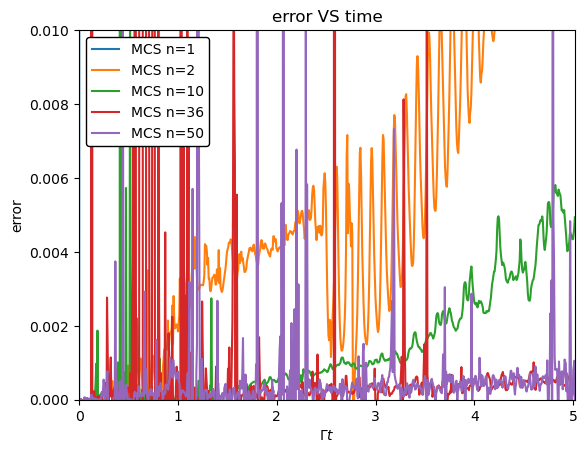

In [4]:
#================================
#== full time scale

#-- COHERENT STATES
for key in dyns:
    plt.plot( dyns[key].times*Gamma, dyns[key].nk[:,0], label='MCS n='+str(key) )

plt.ylabel( "n" )
plt.xlabel( "$\Gamma t$" )
plt.title( "cavity photons VS time"  )
plt.legend()
plt.show()

#================================
#== high time scale

#-- COHERENT STATES
for key in dyns:
    plt.plot( dyns[key].times*Gamma, dyns[key].nk[:,0], label='MCS n='+str(key) )

plt.xlim(70*Gamma,80*Gamma)
plt.ylim(4,4.5)

plt.ylabel( "n" )
plt.xlabel( "$\Gamma t$" )
plt.title( "cavity photons VS time"  )
plt.legend()
plt.show()

#================================
#== plotting the error

for key in dyns:
    plt.plot( dyns[key].times*Gamma, dyns[key].error, label='MCS n='+str(key) )

plt.ylabel( "error" )
plt.xlabel( "$\Gamma t$" )
plt.title( "error VS time"  )
plt.xlim(0,80*Gamma)
plt.ylim(0,0.01)
plt.legend(loc='upper left')
plt.show()

# Coherent states VS Master Equation

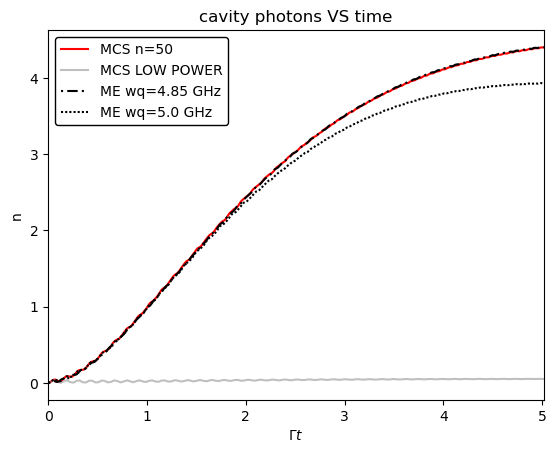

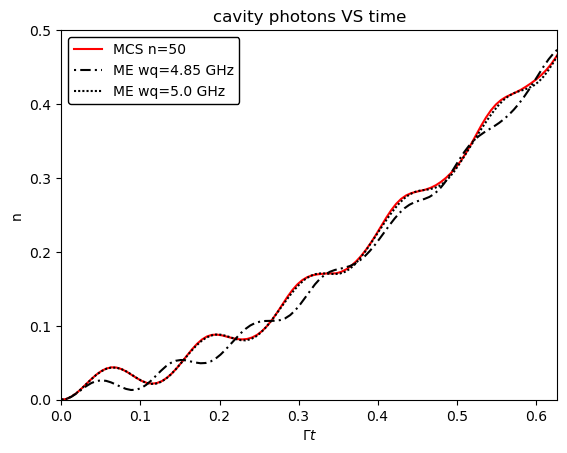

In [50]:
#================================
#== full time scale

#-- COHERENT STATES
plt.plot( dyns[50].times*Gamma, dyns[50].nk[:,0], label='MCS n='+str(50), color='red' )
plt.plot( dyns_LP[10].times*Gamma, dyns_LP[10].nk[:,0], label="MCS LOW POWER", alpha=0.5,c='gray'  )
    
#-- MASTER EQUATION
for i, key in enumerate([4.85,5.0]):
    plt.plot( times_me[key]*Gamma, photons_me[key], dashes=dashes_arr[i], label='ME wq='+str(key)+' GHz', c='black')

plt.xlim(0,80*Gamma)
plt.ylabel( "n" )
plt.xlabel( "$\Gamma t$" )
plt.title( "cavity photons VS time"  )
plt.legend()
plt.show()

#================================
#== smaller time scale

#-- COHERENT STATES
plt.plot( dyns[50].times*Gamma, dyns[50].nk[:,0], label='MCS n='+str(50), color='red' )

#-- MASTER EQUATION
for i, key in enumerate([4.85,5.0]):
    plt.plot( times_me[key]*Gamma, photons_me[key], dashes=dashes_arr[i], label='ME wq='+str(key)+' GHz', c='black')

plt.xlim(0,10*Gamma)
plt.ylim(0,0.5)
plt.ylabel( "n" )
plt.xlabel( "$\Gamma t$" )
plt.title( "cavity photons VS time"  )
plt.legend()
plt.show()

## Population Decay

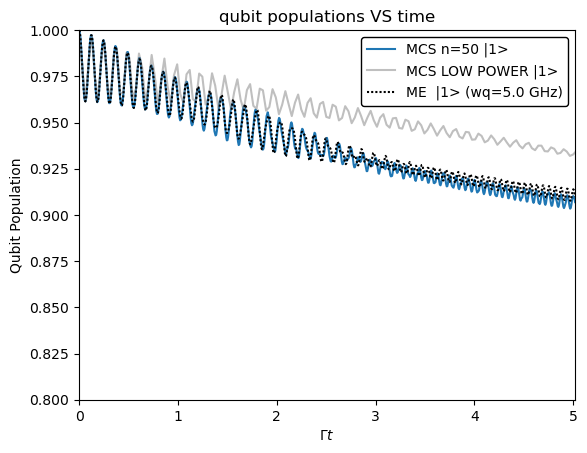

In [53]:
#-- COHERENT STATES
n=50
plt.plot( dyns[n].times*Gamma, dyns[n].pplt[:,2], label='MCS n='+str(n)+' |1>' )
plt.plot( dyns_LP[10].times*Gamma, dyns_LP[10].pplt[:,2], label="MCS LOW POWER |1>", alpha=0.5,c='gray'  )
plt.xlim(0,80*Gamma)
plt.ylim(0.80,1)
    
#-- MASTER EQUATION
plt.plot( times_me[5.0]*Gamma, pplt_me[5.0][:,2], label='ME  |1> (wq=5.0 GHz)', dashes=dashes_arr[1], color ='black')

plt.ylabel( "Qubit Population" )
plt.xlabel( "$\Gamma t$" )
plt.title( "qubit populations VS time"  )
plt.legend()
plt.show()

# Entropy

In [58]:
entropies={}
for key in [1,2,10,50]:
    entropies[key] = dyns[key].final_state.renyi_entropy(0, 20)

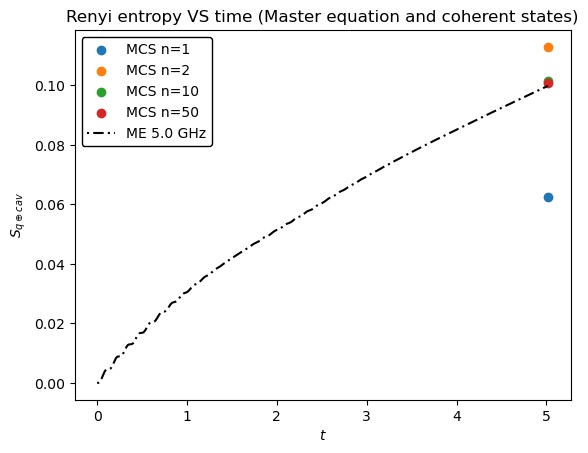

In [61]:
#-- plotting the mean photon number in the cavity
for key in [1,2,10,50]:
    #plt.plot( dyns[key].times*Gamma, dyns[key].entropy, label=key)
    plt.scatter( dyns[key].times[-1]*Gamma, entropies[key], label="MCS n="+str(key))
    
#-- MASTER EQUATION
for i, key in enumerate([5.0]):
    plt.plot( times_me[key]*Gamma, entropy_me[key], dashes=dashes_arr[i], label='ME '+str(key)+' GHz', c='black' )
    
plt.ylabel( "$S_{q \oplus cav}$" )
plt.xlabel( "$t$" )
plt.title( "Renyi entropy VS time (Master equation and coherent states)" )
plt.legend()

# Bath Spectrum

(0.0, 0.01)

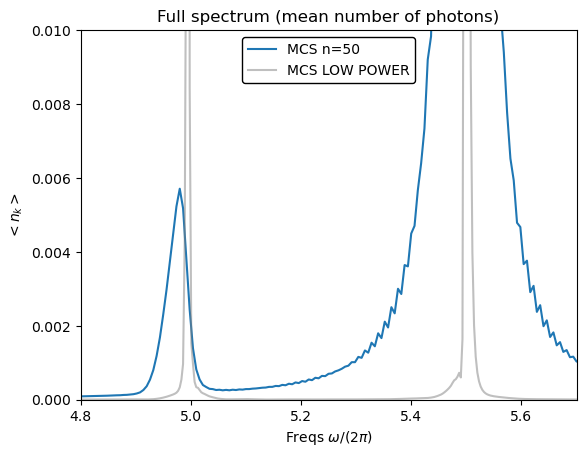

In [52]:
plt.plot( dyns[50].wk/(2*(np.pi)), dyns[50].nk[-1,1:], label="MCS n=50"  )
plt.plot( dyns_LP[10].wk/(2*(np.pi)), dyns_LP[10].nk[-1,1:], label="MCS LOW POWER", alpha=0.5,c='gray'  )

plt.title( "Full spectrum (mean number of photons)"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()

plt.xlim(4.8,5.7)
plt.ylim( 0,0.01 )

# Cavity Wigner functions

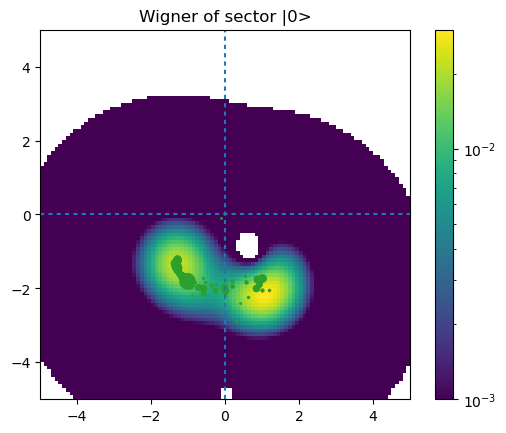

In [47]:
plt.title('Wigner of sector |0>')
dyns[50].plot_split_wigner(s=0,xmin=-5, log_min=0.001)

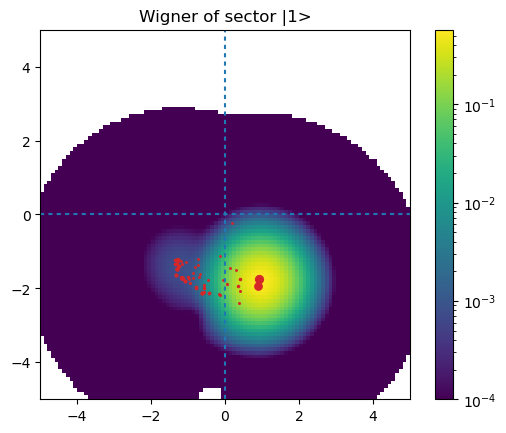

In [57]:
plt.title('Wigner of sector |1>')
dyns[50].plot_split_wigner(1, xmin=-5, log_min=0.0001)

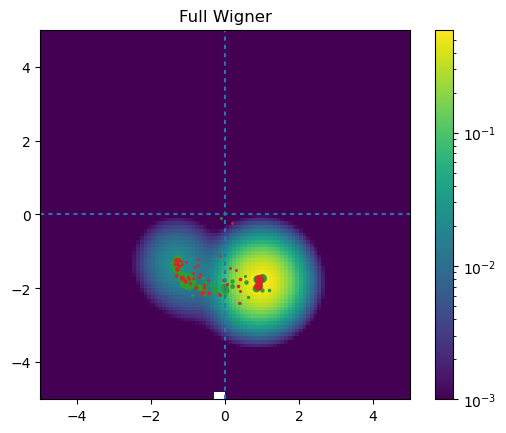

In [56]:
plt.title('Full Wigner')
dyns[50].plot_wigner( xmin=-5 , log_min=0.001)